# Credit Card Fraud Detection

![image.png](https://mercobank.com/assets/frontend/img/pages/fp.png)

***Author:*** *Cesar Chalco Elias </br>*
***Twitter:*** *[@chesar_che](https://twitter.com/chesar_che)*

***Metadata:*** </br>
- This dataset has 122 variables wich simulate a real business scenario such as IncomeTotal, AMTAPPLICATION, AMT_CREDIT, etc.
- The information about variables is attached with csv file.
- Data is available here: [Credit Card Fraud Detection](https://www.kaggle.com/mishra5001/credit-card?select=application_data.csv)

***Purpose:***</br>
- Understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

***Attribute Information*** </br>
- Description of attributes is avilable here: [description](https://www.kaggle.com/mishra5001/credit-card?select=columns_description.csv)

## 💾 Libraries

In [1]:
# pip install altair==4.2.0rc1
# pip install openpyxl
# pip install xgboost
# pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import random

import altair as alt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn as skl
import warnings
warnings.filterwarnings("ignore")

In [3]:
random.seed(14)

In [4]:
print(' ..:: VERSIONS ::..')
print(f' Numpy version: {np.__version__}')
print(f' Pandas version: {pd.__version__}')
print(f' Altair version: {alt.__version__}')
print(f' Seaborn version: {sns.__version__}')
print(f' Matplotlib version: {mpl.__version__}')
print(f' Scikit Learn version: {skl.__version__}')

 ..:: VERSIONS ::..
 Numpy version: 1.22.1
 Pandas version: 1.3.4
 Altair version: 4.2.0rc1
 Seaborn version: 0.11.2
 Matplotlib version: 3.5.0
 Scikit Learn version: 1.0.1


## 📗 Data Reading

In [5]:
%%time
data = pd.read_csv('data/data.csv', delimiter=',')

Wall time: 5.86 s


In [6]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.shape

(307511, 122)

- I have 307511 rows and 122 columns in this dataset.

In [8]:
data.memory_usage(deep=True)

Index                              128
SK_ID_CURR                     2460088
TARGET                         2460088
NAME_CONTRACT_TYPE            20749632
CODE_GENDER                   17835646
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      2460088
AMT_REQ_CREDIT_BUREAU_WEEK     2460088
AMT_REQ_CREDIT_BUREAU_MON      2460088
AMT_REQ_CREDIT_BUREAU_QRT      2460088
AMT_REQ_CREDIT_BUREAU_YEAR     2460088
Length: 123, dtype: int64

# Exploratory Data Analysis (EDA)

## 🔍 Data Inspection

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
pp = list(np.arange(0.1, 0.9, 0.1)) + list(np.arange(0.9, 1.0, 0.01))
descriptives = data.describe(percentiles = pp)
descriptives

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,135692.000000,0.000000,0.000000,8.100000e+04,1.800000e+05,11074.500000,1.800000e+05,0.006629,-22181.000000,-4881.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,171327.000000,0.000000,0.000000,9.900000e+04,2.547000e+05,14701.500000,2.250000e+05,0.008866,-20474.000000,-3231.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,207121.000000,0.000000,0.000000,1.125000e+05,3.063060e+05,18189.000000,2.700000e+05,0.010643,-18885.000000,-2362.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
40%,242626.000000,0.000000,0.000000,1.350000e+05,4.320000e+05,21865.500000,3.735000e+05,0.016612,-17220.000000,-1695.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
60%,313865.000000,0.000000,0.000000,1.620000e+05,6.041520e+05,28062.000000,5.220000e+05,0.020713,-14416.000000,-822.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


- There is a suspicion of a outliers presence because the ratio between the last computed percentiles.

In [11]:
data.isnull().sum().any()

True

- There are missing values in the dataset.

## 🔧 Missing Values Treatment

In [12]:
missings_df = pd.DataFrame(data.isnull().mean(), columns=['p_missing'])

In [13]:
missings_df.loc[missings_df['p_missing']>0]

,p_missing
AMT_ANNUITY,0.000039
AMT_GOODS_PRICE,0.000904
NAME_TYPE_SUITE,0.004201
OWN_CAR_AGE,0.659908
OCCUPATION_TYPE,0.313455
...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,0.135016
AMT_REQ_CREDIT_BUREAU_MON,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,0.135016


- There are 67 variables with missing values. So, I will remove variables with 15% or more of missing values because they are not recommended for imputation and just obstruct the analysis.

In [14]:
mask = missings_df['p_missing']>0.15
columns = list(missings_df.loc[mask].index)

In [15]:
def ptg_missing(df, c):
    return (df[str(c)].isnull().mean() * 100)

In [16]:
data_trt_missing = data.copy()

In [17]:
%%time
index = 0
print(' ---------------------------------------------------------------------')
for column in columns:
    if ptg_missing(data_trt_missing, column) > 15:
        print(f'Removing <{column}> column... with <{round(ptg_missing(data_trt_missing, column), 2)}%> of missing values')
        data_trt_missing.drop(str(column), axis=1, inplace=True)
        index+=1
print(' ---------------------------------------------------------------------')
print(f' {index} columns have been removed.')

 ---------------------------------------------------------------------
Removing <OWN_CAR_AGE> column... with <65.99%> of missing values
Removing <OCCUPATION_TYPE> column... with <31.35%> of missing values
Removing <EXT_SOURCE_1> column... with <56.38%> of missing values
Removing <EXT_SOURCE_3> column... with <19.83%> of missing values
Removing <APARTMENTS_AVG> column... with <50.75%> of missing values
Removing <BASEMENTAREA_AVG> column... with <58.52%> of missing values
Removing <YEARS_BEGINEXPLUATATION_AVG> column... with <48.78%> of missing values
Removing <YEARS_BUILD_AVG> column... with <66.5%> of missing values
Removing <COMMONAREA_AVG> column... with <69.87%> of missing values
Removing <ELEVATORS_AVG> column... with <53.3%> of missing values
Removing <ENTRANCES_AVG> column... with <50.35%> of missing values
Removing <FLOORSMAX_AVG> column... with <49.76%> of missing values
Removing <FLOORSMIN_AVG> column... with <67.85%> of missing values
Removing <LANDAREA_AVG> column... with <5

- There were many columns with high percentage of missing values (51).

In [18]:
data.shape , data_trt_missing.shape

((307511, 122), (307511, 71))

- Now, I only have these variables:

In [19]:
data_trt_missing.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

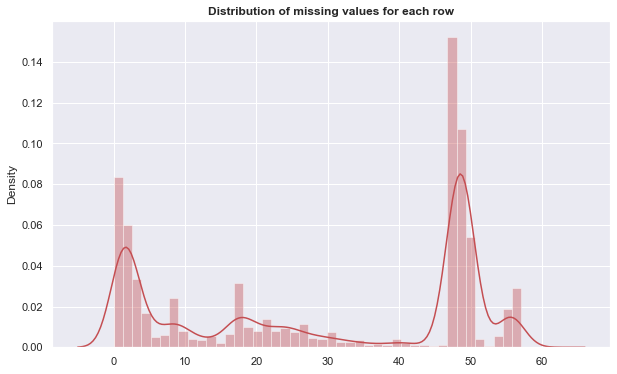

In [20]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.set_title('Distribution of missing values for each row', weight='bold')
sns.distplot(data.isnull().sum(axis =1), color='r')
plt.show()

- Due to there were many columns with high percentage of missing values, each row had too many missing values.

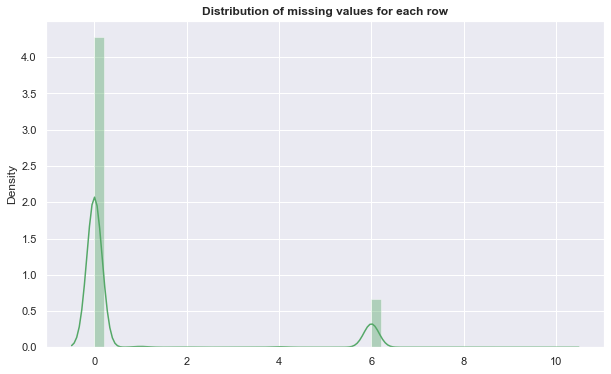

In [21]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.set_title('Distribution of missing values for each row', weight='bold')
sns.distplot(data_trt_missing.isnull().sum(axis =1), color='g')
plt.show()

- Before removing columns with high amount of missing values a great part of rows had 50 NaN values and after just a few rows have around 6 NaN values.

In [22]:
summary = pd.DataFrame()

summary['pct_missings'] = data_trt_missing.isnull().sum() / data_trt_missing.shape[0]
summary['pct_zeros'] = (data_trt_missing == 0).sum() / data_trt_missing.shape[0]
summary['pct_miss_zer'] = summary['pct_missings'] + summary['pct_zeros']

summary.T

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
pct_missings,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000039,...,0.00000,0.000000,0.000000,0.000000,0.135016,0.135016,0.135016,0.135016,0.135016,0.135016
pct_zeros,0.0,0.919271,0.0,0.0,0.0,0.0,0.700368,0.0,0.0,0.000000,...,0.99187,0.999405,0.999493,0.999665,0.859696,0.860142,0.837225,0.722683,0.700518,0.233491
pct_miss_zer,0.0,0.919271,0.0,0.0,0.0,0.0,0.700368,0.0,0.0,0.000039,...,0.99187,0.999405,0.999493,0.999665,0.994712,0.995158,0.972242,0.857699,0.835534,0.368507


- It's important verify missing values and zero values, because zeros could mess the analysis.

In [23]:
data_trt_missing.sample(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
252879,392609,0,Cash loans,M,Y,N,2,225000.0,393543.0,20223.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
212192,345891,0,Cash loans,F,N,Y,0,112500.0,942300.0,36643.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
192604,323353,1,Cash loans,M,N,Y,1,225000.0,942300.0,30528.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
categorical_columns = list(data_trt_missing.select_dtypes('object').columns)
numerical_columns   = list(data_trt_missing.select_dtypes(['int','float']).columns)

- Categorical columns are correct. There are not filtered continous variables.

In [25]:
data_trt_missing[numerical_columns].isnull().mean()

SK_ID_CURR                     0.000000
TARGET                         0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
CNT_FAM_MEMBERS                0.000007
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000


In [26]:
data_trt_missing[categorical_columns].isnull().sum()

NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
dtype: int64

In [27]:
data_trt_missing['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

- Based on my knowledgment, I can remove NAME_TYPE_SUITE and SK_ID_CURR column because the first is not a confidence variable and the second one is irrelevant.

In [28]:
len(numerical_columns), len(categorical_columns)

(60, 11)

In [29]:
data_trt_missing.drop(['NAME_TYPE_SUITE','SK_ID_CURR'], axis=1, inplace=True)

In [30]:
numerical_columns = list(data_trt_missing.select_dtypes(['int','float']).columns)
categorical_columns = list(data_trt_missing.select_dtypes('object').columns)
len(numerical_columns), len(categorical_columns)

(59, 10)

In [31]:
data_trt_missing[(data_trt_missing['AMT_REQ_CREDIT_BUREAU_DAY'].isna())]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,427500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307484,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,450000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307501,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307504,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data_trt_missing[(data_trt_missing['AMT_REQ_CREDIT_BUREAU_DAY'].isna())]['TARGET'].value_counts()

0    37227
1     4292
Name: TARGET, dtype: int64

In [33]:
data_trt_missing.shape

(307511, 69)

In [34]:
print(f'Missing rows are {round(41519 / 307511 * 100, 2)}% of total.')

Missing rows are 13.5% of total.


- I will remove some rows with missing values.
- I won't impute them because the computational cost is high.

In [35]:
data_trt_missing.dropna(inplace=True)

In [36]:
data_trt_missing.shape

(264374, 69)

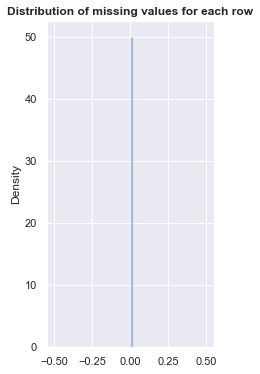

In [37]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(3,6)
ax.set_title('Distribution of missing values for each row', weight='bold')
sns.distplot(data_trt_missing.isnull().sum(axis =1), color='b')
plt.show()

- The dataset doesn't have any missing values. It is ready for analysis or other treatments.

## 🧰 Outliers Treatment

- I will create a dataframe with last percentiles for look possible outliers values:

In [38]:
data_describe = data_trt_missing.describe(percentiles=pp)

In [39]:
data_describe

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,264374.000000,264374.000000,2.643740e+05,2.643740e+05,264374.000000,2.643740e+05,264374.000000,264374.000000,264374.000000,264374.000000,...,264374.000000,264374.000000,264374.000000,264374.000000,264374.000000,264374.000000,264374.000000,264374.000000,264374.000000,264374.000000
mean,0.077349,0.422636,1.712238e+05,6.074284e+05,27212.738286,5.456607e+05,0.020818,-16116.352588,63515.981416,-4986.506014,...,0.008609,0.000632,0.000586,0.000314,0.006400,0.007005,0.034413,0.267685,0.265953,1.902214
std,0.267145,0.725835,2.488904e+05,4.050773e+05,14382.636782,3.716576e+05,0.013728,4308.348420,141097.152091,3522.825043,...,0.092385,0.025125,0.024206,0.017716,0.083859,0.110688,0.204563,0.915978,0.795146,1.869527
min,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25201.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,8.100000e+04,1.800000e+05,11250.000000,1.800000e+05,0.006671,-22181.000000,-5002.000000,-9928.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,0.000000,0.000000,1.035000e+05,2.547000e+05,14832.000000,2.250000e+05,0.008866,-20508.000000,-3328.000000,-8228.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,0.000000,0.000000,1.125000e+05,3.141000e+05,18414.000000,2.700000e+05,0.010556,-18926.000000,-2441.000000,-6774.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
40%,0.000000,0.000000,1.350000e+05,4.500000e+05,21915.000000,4.005000e+05,0.016612,-17272.000000,-1761.000000,-5473.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.575000e+05,5.212800e+05,25029.000000,4.500000e+05,0.018850,-15811.000000,-1264.000000,-4513.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
60%,0.000000,0.000000,1.710000e+05,6.281145e+05,28215.000000,5.400000e+05,0.020713,-14514.000000,-855.000000,-3535.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


- In this function I exclude variables with values between 0 and 1:

In [40]:
outliers_max = []

def get_max_outliers_ratio(df):
    df_columns = list(df.columns)
    for column in df_columns:
        max_value = float(df.loc['max', str(column)])
        pp_value = float(df.loc['95%', str(column)])
        if max_value > 1.0:
            outliers_max.append(str(column))
            pp_value = float(df.loc['95%', str(column)])
            if pp_value!=0:
                ratio = max_value / pp_value
            else:
                ratio = -1
            print(f'Ratio of {column} column: {ratio}')

In [41]:
get_max_outliers_ratio(data_describe)

Ratio of CNT_CHILDREN column: 9.5
Ratio of AMT_INCOME_TOTAL column: 346.6666666666667
Ratio of AMT_CREDIT column: 3.0
Ratio of AMT_ANNUITY column: 4.845276322460706
Ratio of AMT_GOODS_PRICE column: 3.0508474576271185
Ratio of DAYS_EMPLOYED column: 1.0
Ratio of CNT_FAM_MEMBERS column: 5.0
Ratio of REGION_RATING_CLIENT column: 1.0
Ratio of REGION_RATING_CLIENT_W_CITY column: 1.0
Ratio of HOUR_APPR_PROCESS_START column: 1.3529411764705883
Ratio of OBS_30_CNT_SOCIAL_CIRCLE column: 58.0
Ratio of DEF_30_CNT_SOCIAL_CIRCLE column: 34.0
Ratio of OBS_60_CNT_SOCIAL_CIRCLE column: 57.333333333333336
Ratio of DEF_60_CNT_SOCIAL_CIRCLE column: 24.0
Ratio of AMT_REQ_CREDIT_BUREAU_HOUR column: -1
Ratio of AMT_REQ_CREDIT_BUREAU_DAY column: -1
Ratio of AMT_REQ_CREDIT_BUREAU_WEEK column: -1
Ratio of AMT_REQ_CREDIT_BUREAU_MON column: 27.0
Ratio of AMT_REQ_CREDIT_BUREAU_QRT column: 130.5
Ratio of AMT_REQ_CREDIT_BUREAU_YEAR column: 4.166666666666667


In [42]:
data_trt_missing[outliers_max].describe(percentiles=list(np.arange(0.9,1,0.01))).T

,count,mean,std,min,50%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
CNT_CHILDREN,264374.0,0.422636,0.725835,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000,2.0,3.0,19.0
AMT_INCOME_TOTAL,264374.0,171223.837943,248890.383987,26100.0,157500.0,270000.0,288000.0,292500.0,315000.0,315000.0,337500.0,360000.0,382500.000,427500.0,486000.0,117000000.0
AMT_CREDIT,264374.0,607428.377006,405077.284998,45000.0,521280.0,1159515.0,1223010.0,1256400.0,1288350.0,1314117.0,1350000.0,1461775.5,1546020.000,1687266.0,1886850.0,4050000.0
AMT_ANNUITY,264374.0,27212.738286,14382.636782,1615.5,25029.0,45954.0,47254.5,48456.0,49873.5,51745.5,53253.0,55507.5,58328.145,62698.5,69754.5,258025.5
AMT_GOODS_PRICE,264374.0,545660.672016,371657.592278,40500.0,450000.0,1125000.0,1125000.0,1125000.0,1129500.0,1170000.0,1327500.0,1350000.0,1354500.000,1575000.0,1800000.0,4050000.0
DAYS_EMPLOYED,264374.0,63515.981416,141097.152091,-17912.0,-1264.0,365243.0,365243.0,365243.0,365243.0,365243.0,365243.0,365243.0,365243.000,365243.0,365243.0,365243.0
CNT_FAM_MEMBERS,264374.0,2.163961,0.911011,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,4.0,5.0,20.0
REGION_RATING_CLIENT,264374.0,2.053965,0.505177,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000,3.0,3.0,3.0
REGION_RATING_CLIENT_W_CITY,264374.0,2.033158,0.499145,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000,3.0,3.0,3.0
HOUR_APPR_PROCESS_START,264374.0,12.083200,3.253892,0.0,12.0,16.0,17.0,17.0,17.0,17.0,17.0,18.0,18.000,18.0,19.0,23.0


- I'm going to replace max outliers over the 99° percentile with that percentile value.

In [43]:
data_trt_outliers = data_trt_missing.copy()

In [44]:
for column in outliers_max:
    data_trt_outliers[str(column)] = np.where(data_trt_outliers[column] > data_describe[column]['99%'], data_describe[column]['99%'], data_trt_outliers[column])

In [45]:
data_trt_outliers[outliers_max].describe(percentiles=list(np.arange(0.9,1,0.01))).T

,count,mean,std,min,50%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
CNT_CHILDREN,264374.0,0.420003,0.710674,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000,2.0,3.0,3.0
AMT_INCOME_TOTAL,264374.0,168616.642039,84062.500203,26100.0,157500.0,270000.0,288000.0,292500.0,315000.0,315000.0,337500.0,360000.0,382500.000,427500.0,486000.0,486000.0
AMT_CREDIT,264374.0,604778.688907,394881.961622,45000.0,521280.0,1159515.0,1223010.0,1256400.0,1288350.0,1314117.0,1350000.0,1461775.5,1546020.000,1687266.0,1886850.0,1886850.0
AMT_ANNUITY,264374.0,27045.052307,13594.142365,1615.5,25029.0,45954.0,47254.5,48456.0,49873.5,51745.5,53253.0,55507.5,58328.145,62698.5,69754.5,69754.5
AMT_GOODS_PRICE,264374.0,543849.787872,364088.813729,40500.0,450000.0,1125000.0,1125000.0,1125000.0,1129500.0,1170000.0,1327500.0,1350000.0,1354500.000,1575000.0,1800000.0,1800000.0
DAYS_EMPLOYED,264374.0,63515.981416,141097.152091,-17912.0,-1264.0,365243.0,365243.0,365243.0,365243.0,365243.0,365243.0,365243.0,365243.000,365243.0,365243.0,365243.0
CNT_FAM_MEMBERS,264374.0,2.161442,0.898874,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,4.0,5.0,5.0
REGION_RATING_CLIENT,264374.0,2.053965,0.505177,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000,3.0,3.0,3.0
REGION_RATING_CLIENT_W_CITY,264374.0,2.033158,0.499145,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000,3.0,3.0,3.0
HOUR_APPR_PROCESS_START,264374.0,12.074599,3.233089,0.0,12.0,16.0,17.0,17.0,17.0,17.0,17.0,18.0,18.000,18.0,19.0,19.0


- Now, I will check the outliers in minimum values.

In [46]:
data_describe_min = data_trt_outliers.describe(percentiles=list( np.arange(0.01,0.1,0.01) ))

In [47]:
outliers_min = []

def get_min_outliers_ratio(df):
    df_columns = list(df.columns)
    for column in df_columns:
        max_value = float(df.loc['max', str(column)])
        min_value = float(df.loc['min', str(column)])
        pp_value_01 = float(df.loc['1%', str(column)])
        pp_value_02 = float(df.loc['2%', str(column)])
        pp_value_03 = float(df.loc['3%', str(column)])
        if max_value > 1.0:
            outliers_min.append(str(column))
            if pp_value_01!=0 and pp_value_02!=0 and pp_value_03!=0:
                ratio_01 = min_value / pp_value_01
                ratio_02 = min_value / pp_value_02
                ratio_03 = min_value / pp_value_03
                print(f'Ratios of {column} column: (1% → {ratio_01}) (2% → {ratio_02}) (3% → {ratio_03})')
            else:
                print(f'Min:{min_value} (1% → {pp_value_01}) (2% → {pp_value_02}) (3% → {pp_value_03})')
            

In [48]:
get_min_outliers_ratio(data_describe_min)

Min:0.0 (1% → 0.0) (2% → 0.0) (3% → 0.0)
Ratios of AMT_INCOME_TOTAL column: (1% → 0.58) (2% → 0.48333333333333334) (3% → 0.38666666666666666)
Ratios of AMT_CREDIT column: (1% → 0.5889281507656066) (2% → 0.4416961130742049) (3% → 0.37533310813346843)
Ratios of AMT_ANNUITY column: (1% → 0.25995655322230266) (2% → 0.23525557011795545) (3% → 0.20467502850627137)
Ratios of AMT_GOODS_PRICE column: (1% → 0.6) (2% → 0.45) (3% → 0.391304347826087)
Ratios of DAYS_EMPLOYED column: (1% → 1.6261063051563873) (2% → 1.9168412784363915) (3% → 2.17378640776699)
Ratios of CNT_FAM_MEMBERS column: (1% → 1.0) (2% → 1.0) (3% → 1.0)
Ratios of REGION_RATING_CLIENT column: (1% → 1.0) (2% → 1.0) (3% → 1.0)
Ratios of REGION_RATING_CLIENT_W_CITY column: (1% → 1.0) (2% → 1.0) (3% → 1.0)
Ratios of HOUR_APPR_PROCESS_START column: (1% → 0.0) (2% → 0.0) (3% → 0.0)
Min:0.0 (1% → 0.0) (2% → 0.0) (3% → 0.0)
Min:0.0 (1% → 0.0) (2% → 0.0) (3% → 0.0)
Min:0.0 (1% → 0.0) (2% → 0.0) (3% → 0.0)
Min:0.0 (1% → 0.0) (2% → 0.0) (3%

- The succession between values is correct. So, they don't need a imputation.

## 🧽 Saving cleaned dataframe

In [49]:
data_cleaned = data_trt_outliers.copy()

In [50]:
data_cleaned.shape

(264374, 69)

In [51]:
#data_cleaned.to_excel("output/data_treated.xlsx")

- The cleaned dataset has 39 numerical and 10 categorical columns.

## 🔖 Data Understanding

In [52]:
data_cleaned.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CI

In [53]:
data_cleaned.sample(4)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
227369,0,Cash loans,M,Y,Y,0.0,157500.0,263686.5,29880.0,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
188804,0,Cash loans,F,Y,Y,0.0,180000.0,1546020.0,42642.0,1350000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
135320,0,Cash loans,F,N,Y,1.0,90000.0,1097676.0,32094.0,958500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
235836,0,Cash loans,F,N,N,0.0,202500.0,900000.0,35694.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


## ❓ *Which is the most common contract type in fraud cases?*

In [54]:
data_cleaned.groupby(by=['TARGET','NAME_CONTRACT_TYPE'])[['NAME_CONTRACT_TYPE']].count()

NAME_CONTRACT_TYPE
TARGET NAME_CONTRACT_TYPE                    
0      Cash loans                      221308
       Revolving loans                  22617
1      Cash loans                       19196
       Revolving loans                   1253

- The most frequent contract type in fraud cases is Cash loans.

## ❓ *Which is the most frequent gender in fraud cases?*

In [55]:
data_cleaned.groupby(by=['TARGET','CODE_GENDER'])[['CODE_GENDER']].count()

CODE_GENDER
TARGET CODE_GENDER             
0      F                 163327
       M                  80594
       XNA                    4
1      F                  11821
       M                   8628

- In general, women are more frequently than men. But the proportion between men and women in fraud and no fraud cases are different.
- In no fraud cases, the proportion is 0.33% men and 0.67% women. While, in fraud cases, the proportion is 42% men and 58% women.

## ❓ *Is the number of children related to fraud cases?*

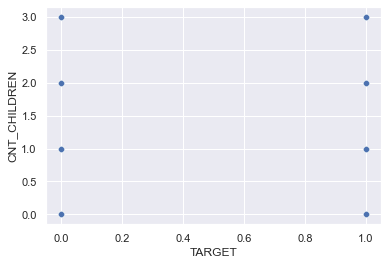

In [56]:
fig, ax = plt.subplots()

ax = sns.scatterplot(x="TARGET", y="CNT_CHILDREN", data=data_cleaned)
plt.show()

- The number of children is not related to fraud cases.

## ❓ *Which is the most frequent education level in fraud cases?*

In [57]:
data_cleaned.groupby(by=['TARGET','NAME_EDUCATION_TYPE'])[['NAME_EDUCATION_TYPE']].count()

NAME_EDUCATION_TYPE
TARGET NAME_EDUCATION_TYPE                               
0      Academic degree                                141
       Higher education                             62466
       Incomplete higher                             7843
       Lower secondary                               2800
       Secondary / secondary special               170675
1      Academic degree                                  3
       Higher education                              3468
       Incomplete higher                              694
       Lower secondary                                330
       Secondary / secondary special                15954

- It's very unlikely that a person with an academic degree commit fraud.
- The most common education level in fraud cases are Secondary and Higher education.

## ❓ *What propierties or documents are frequent in fraud cases?*

In [58]:
flag_columns = []
data_columns = list(data_cleaned.columns)

for c in data_columns:
    if (c).startswith('FLAG'):
        flag_columns.append(c)

In [59]:
flag_columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [60]:
for c in flag_columns:
    display( data_cleaned.groupby(by=c)[['TARGET']].count() )

,TARGET
FLAG_OWN_CAR,
N,172282
Y,92092


,TARGET
FLAG_OWN_REALTY,
N,81951
Y,182423


,TARGET
FLAG_MOBIL,
1,264374


,TARGET
FLAG_EMP_PHONE,
0,47439
1,216935


,TARGET
FLAG_WORK_PHONE,
0,212084
1,52290


,TARGET
FLAG_CONT_MOBILE,
0,526
1,263848


,TARGET
FLAG_PHONE,
0,188943
1,75431


,TARGET
FLAG_EMAIL,
0,249083
1,15291


,TARGET
FLAG_DOCUMENT_2,
0,264374


,TARGET
FLAG_DOCUMENT_3,
0,75427
1,188947


,TARGET
FLAG_DOCUMENT_4,
0,264350
1,24


,TARGET
FLAG_DOCUMENT_5,
0,260489
1,3885


,TARGET
FLAG_DOCUMENT_6,
0,241036
1,23338


,TARGET
FLAG_DOCUMENT_7,
0,264338
1,36


,TARGET
FLAG_DOCUMENT_8,
0,242626
1,21748


,TARGET
FLAG_DOCUMENT_9,
0,263389
1,985


,TARGET
FLAG_DOCUMENT_10,
0,264368
1,6


,TARGET
FLAG_DOCUMENT_11,
0,263474
1,900


,TARGET
FLAG_DOCUMENT_12,
0,264372
1,2


,TARGET
FLAG_DOCUMENT_13,
0,263347
1,1027


,TARGET
FLAG_DOCUMENT_14,
0,263512
1,862


,TARGET
FLAG_DOCUMENT_15,
0,264021
1,353


,TARGET
FLAG_DOCUMENT_16,
0,261538
1,2836


,TARGET
FLAG_DOCUMENT_17,
0,264299
1,75


,TARGET
FLAG_DOCUMENT_18,
0,262098
1,2276


,TARGET
FLAG_DOCUMENT_19,
0,264207
1,167


,TARGET
FLAG_DOCUMENT_20,
0,264219
1,155


,TARGET
FLAG_DOCUMENT_21,
0,264291
1,83


In [61]:
data_cleaned.FLAG_MOBIL.value_counts(dropna=False)

1    264374
Name: FLAG_MOBIL, dtype: int64

In [62]:
data_cleaned.FLAG_DOCUMENT_2.value_counts(dropna=False)

0    264374
Name: FLAG_DOCUMENT_2, dtype: int64

In [63]:
data_cleaned.drop(['FLAG_MOBIL','FLAG_DOCUMENT_2'],axis=1,inplace=True)

- It's common that in fraud cases people don't file to have a car but they file to have own realty.

## 💰  *How is the annual income of clients?*

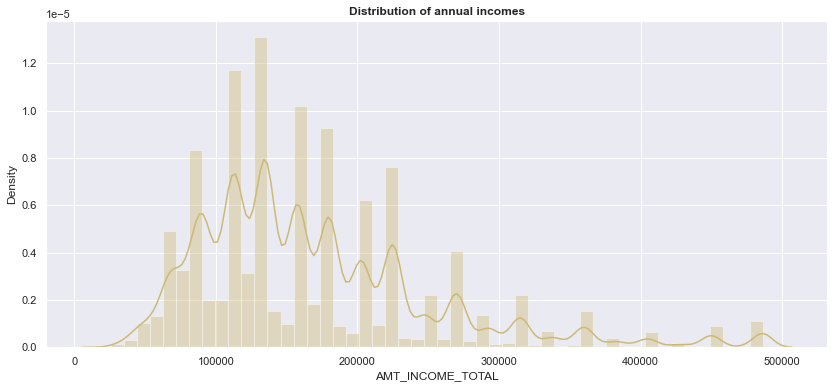

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax.set_title('Distribution of annual incomes', weight='bold')
ax = sns.distplot(data_cleaned.AMT_INCOME_TOTAL, color='y')
plt.show()

## 💰  *How is distribuited the loans amounts?*

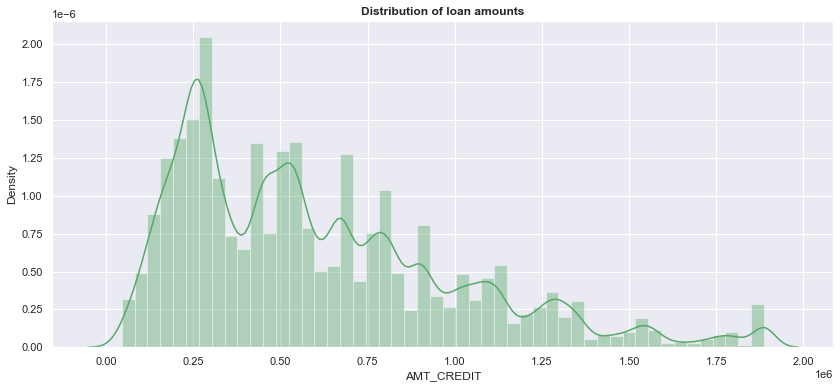

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax.set_title('Distribution of loan amounts', weight='bold')
ax = sns.distplot(data_cleaned.AMT_CREDIT, color='g')
plt.show()

- Both distributions are asymmetrical. So, in the next section I will some especial transformations for this type of variables.

## 🔃   *How correlated are variables?*

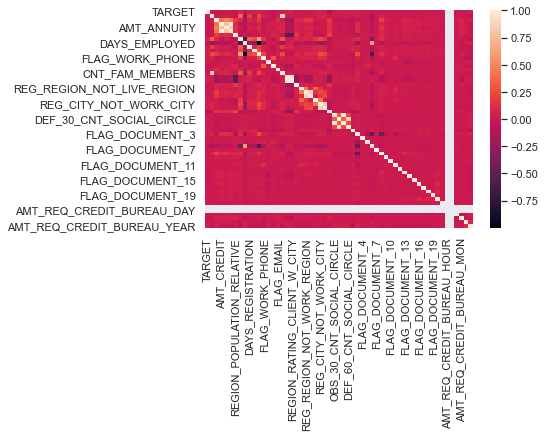

In [66]:
sns.heatmap(data_cleaned.corr())
plt.show()

## 🛠️ Feature Engineering

In [67]:
data_cleaned.shape

(264374, 67)

- Divide categorical and numeric columns:

In [68]:
categorical_columns = list(data_cleaned.select_dtypes('object').columns)
numerical_columns   = list(data_cleaned.select_dtypes(['int','float']).columns)

- I will create new features:

In [69]:
data_cleaned['PCTG_ANNUITY'] = data_cleaned['AMT_ANNUITY'] / data_cleaned['AMT_CREDIT']
data_cleaned['PCTG_GOODS'] = data_cleaned['AMT_GOODS_PRICE'] / data_cleaned['AMT_INCOME_TOTAL']
data_cleaned['INCOME_CHILD'] = data_cleaned['AMT_INCOME_TOTAL'] / (data_cleaned['CNT_CHILDREN'] + 1)

data_cleaned['POSSESSIONS'] = data_cleaned.apply(lambda x: round( (x.FLAG_EMP_PHONE + x.FLAG_WORK_PHONE + x.FLAG_CONT_MOBILE + x.FLAG_PHONE + x.FLAG_EMAIL) ,2),axis=1)

In [70]:
data_cleaned.shape

(264374, 71)

In [71]:
categorical_columns = list(data_cleaned.select_dtypes('object').columns)
numerical_columns   = list(data_cleaned.select_dtypes(['int','float']).columns)

In [72]:
len(numerical_columns)

61

- I will check assymetrical columns and how assymetrical they are:

In [73]:
column_skewness = []
for c in numerical_columns:
    skewness = data_cleaned[str(c)].skew()
    print(f'Column <<{str(c)}>> → Skewness <{skewness}>')
    if abs(skewness) > 1:
        column_skewness.append(str(c))

Column <<TARGET>> → Skewness <3.164238126447759>
Column <<CNT_CHILDREN>> → Skewness <1.6101971263040298>
Column <<AMT_INCOME_TOTAL>> → Skewness <1.362363898737089>
Column <<AMT_CREDIT>> → Skewness <1.0176545507365282>
Column <<AMT_ANNUITY>> → Skewness <0.8391143044611685>
Column <<AMT_GOODS_PRICE>> → Skewness <1.1505400591045192>
Column <<REGION_POPULATION_RELATIVE>> → Skewness <1.4871542662416246>
Column <<DAYS_BIRTH>> → Skewness <-0.117239627698851>
Column <<DAYS_EMPLOYED>> → Skewness <1.670203815373655>
Column <<DAYS_REGISTRATION>> → Skewness <-0.5896034511029702>
Column <<DAYS_ID_PUBLISH>> → Skewness <0.3908988513097541>
Column <<FLAG_EMP_PHONE>> → Skewness <-1.67081875572457>
Column <<FLAG_WORK_PHONE>> → Skewness <1.51739852838376>
Column <<FLAG_CONT_MOBILE>> → Skewness <-22.352177306285355>
Column <<FLAG_PHONE>> → Skewness <0.9508322505606035>
Column <<FLAG_EMAIL>> → Skewness <3.7882804455436796>
Column <<CNT_FAM_MEMBERS>> → Skewness <0.7905965789019663>
Column <<REGION_RATING_CL

In [74]:
len(column_skewness)

46

- I will transform some columns which are relevant for the analysis.
- I will use boxcox transformation because those columns have positive values greater than 0.

In [75]:
cols_trans = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','PCTG_ANNUITY','INCOME_CHILD','PCTG_GOODS']

In [76]:
from scipy.stats import boxcox

for c in cols_trans:
    bc_trans = boxcox(data_cleaned[str(c)])[0]
    data_cleaned['BC_' + c] = bc_trans

In [77]:
data_cleaned_numeric = data_cleaned.copy()

In [78]:
data_cleaned_numeric.shape

(264374, 77)

- I will transform categorical columns with a label encoder because if I use an One Hot Encoder, the matrix will be less interpretable and bigger.

In [79]:
from sklearn.preprocessing import LabelEncoder

for c in categorical_columns:
    print(f'Column: <<{c}>>')
    le = LabelEncoder()
    le.fit(data_cleaned_numeric[str(c)])
    data_cleaned_numeric[str(c)] = le.transform(data_cleaned_numeric[str(c)])

Column: <<NAME_CONTRACT_TYPE>>
Column: <<CODE_GENDER>>
Column: <<FLAG_OWN_CAR>>
Column: <<FLAG_OWN_REALTY>>
Column: <<NAME_INCOME_TYPE>>
Column: <<NAME_EDUCATION_TYPE>>
Column: <<NAME_FAMILY_STATUS>>
Column: <<NAME_HOUSING_TYPE>>
Column: <<WEEKDAY_APPR_PROCESS_START>>
Column: <<ORGANIZATION_TYPE>>


In [80]:
data_cleaned_numeric.shape

(264374, 77)

In [81]:
len(data_cleaned_numeric.select_dtypes(['int','float']).columns)

77

In [82]:
data_cleaned_numeric_final = data_cleaned_numeric.copy()

## 🕵️ Feature Selection

### 🌳 *Feature importances with Random Forest Algorithm*

In [83]:
%%time
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
x = data_cleaned_numeric_final.drop('TARGET',axis=1)
y = data_cleaned_numeric_final.TARGET
forest.fit(x, y)
importances = forest.feature_importances_ 

Wall time: 2min 43s


In [84]:
importances_table = pd.concat([pd.DataFrame({'Driver':list(data_cleaned_numeric_final.columns)}),
                              pd.DataFrame({'Importance':list(forest.feature_importances_)})], axis = 1)
importances_variables = importances_table[['Driver','Importance']].sort_values('Importance', ascending = False).reset_index(drop = True)
importances_variables

,Driver,Importance
0,ORGANIZATION_TYPE,0.066266
1,REGION_POPULATION_RELATIVE,0.046172
2,DAYS_REGISTRATION,0.045076
3,DAYS_EMPLOYED,0.044646
4,DAYS_BIRTH,0.040529
...,...,...
72,FLAG_DOCUMENT_21,0.000000
73,AMT_REQ_CREDIT_BUREAU_HOUR,0.000000
74,FLAG_DOCUMENT_11,0.000000
75,FLAG_DOCUMENT_9,0.000000


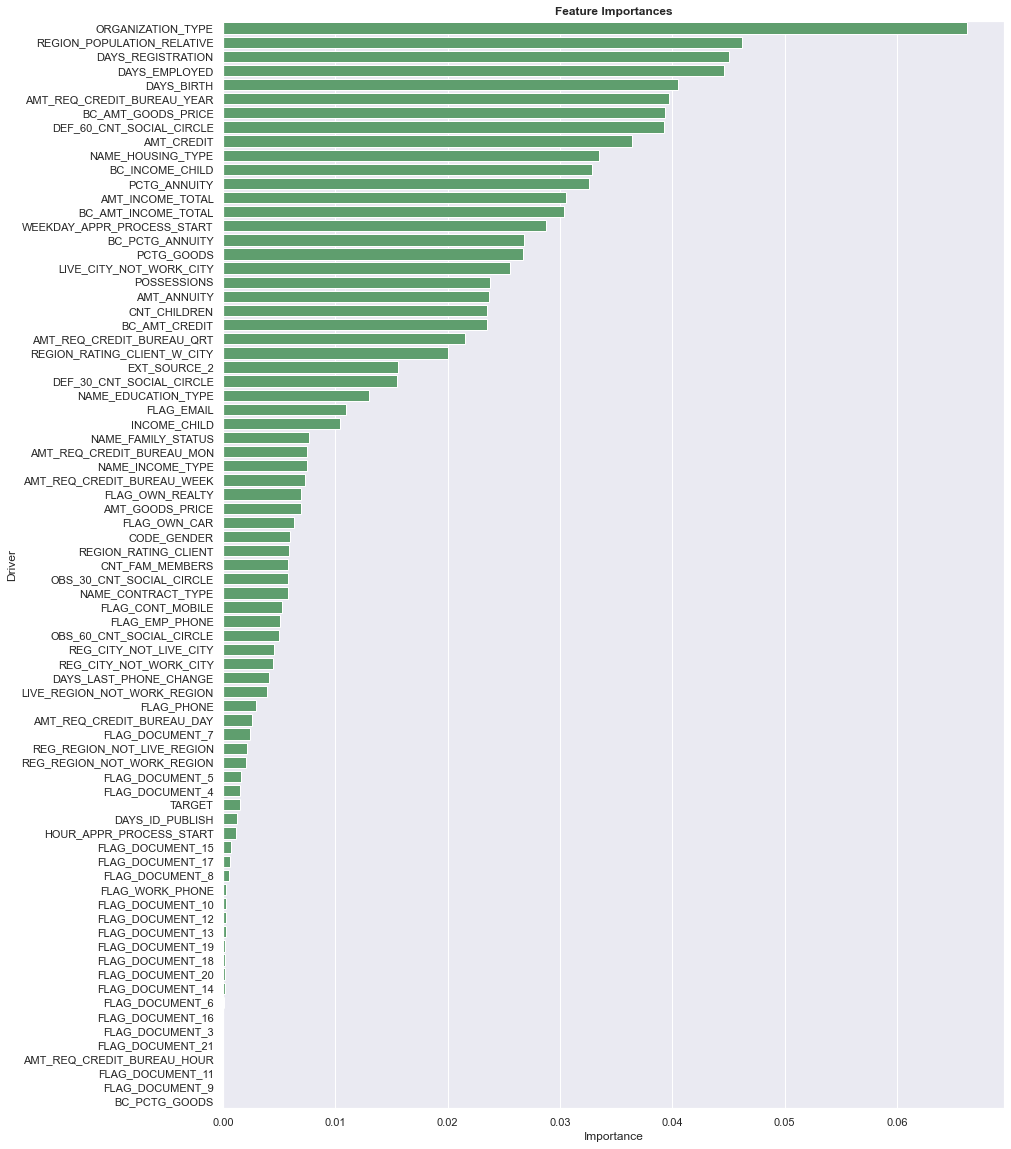

In [85]:
fig, ax = plt.subplots()
fig.set_size_inches(14,20)
ax.set_title('Feature Importances', weight='bold')
sns.barplot(x="Importance", y="Driver", data=importances_variables, color="g")
plt.show()

In [86]:
subset = list(importances_variables.iloc[0:16, 0].values)
subset.append('TARGET')

In [87]:
subset

['ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'BC_AMT_GOODS_PRICE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT',
 'NAME_HOUSING_TYPE',
 'BC_INCOME_CHILD',
 'PCTG_ANNUITY',
 'AMT_INCOME_TOTAL',
 'BC_AMT_INCOME_TOTAL',
 'WEEKDAY_APPR_PROCESS_START',
 'BC_PCTG_ANNUITY',
 'TARGET']

In [88]:
df_subset = data_cleaned_numeric_final[subset]

### 🖥️ *With Scikit Learn library:*

In [89]:
%%time
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = data_cleaned_numeric_final.drop('TARGET', axis=1)
target = data_cleaned_numeric_final.TARGET

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X, target,)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']

Wall time: 4min 56s


In [90]:
print(featureScores.nlargest(15,'Score'))

                        Feature     Score
20             FLAG_CONT_MOBILE  0.056594
18               FLAG_EMP_PHONE  0.038986
12            NAME_HOUSING_TYPE  0.036209
10          NAME_EDUCATION_TYPE  0.036166
25  REGION_RATING_CLIENT_W_CITY  0.033525
24         REGION_RATING_CLIENT  0.033458
41              FLAG_DOCUMENT_3  0.029657
3               FLAG_OWN_REALTY  0.027356
9              NAME_INCOME_TYPE  0.020178
11           NAME_FAMILY_STATUS  0.020035
73              BC_PCTG_ANNUITY  0.018000
23              CNT_FAM_MEMBERS  0.017713
69                  POSSESSIONS  0.017519
66                 PCTG_ANNUITY  0.017393
15                DAYS_EMPLOYED  0.013849


In [91]:
top_subset = ['FLAG_CONT_MOBILE','FLAG_EMP_PHONE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',
             'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','FLAG_DOCUMENT_3',
              'FLAG_OWN_REALTY','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','BC_PCTG_ANNUITY',
             'PCTG_ANNUITY','POSSESSIONS','CNT_FAM_MEMBERS','DAYS_EMPLOYED']

top_subset.append('TARGET')

In [92]:
df_top_subset = data_cleaned_numeric_final[top_subset]

- After I have been trying with features selected by the random forest and the scikit learn library for feature selection, the library achieve a better performance.

## 📏 Standardization

- I reset the index because before I removed some rows with missing values and indexes are not ordered. So, when I try to concatenate both dataframes, pandas will throw an error.
- I want to standardize values because all of them have multiple scales, like that the algoritm won't atributte more weight to some of them.

In [93]:
df_top_subset_index = df_top_subset.reset_index()

In [94]:
predictors = df_top_subset_index.drop(['TARGET','index'], axis=1)
target = df_top_subset_index.TARGET

In [95]:
predictors.head(10)

,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_DOCUMENT_3,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,BC_PCTG_ANNUITY,PCTG_ANNUITY,POSSESSIONS,CNT_FAM_MEMBERS,DAYS_EMPLOYED
0,1,1,4,1,2.0,2.0,1,1,3,7,-6.245355,0.060749,3,1.0,-637.0
1,1,1,1,1,1.0,1.0,1,0,1,4,-10.328605,0.027598,3,2.0,-1188.0
2,1,1,4,1,2.0,2.0,0,1,3,7,-7.105325,0.050000,4,1.0,-225.0
3,1,1,4,1,2.0,2.0,0,1,3,7,-7.877176,0.042623,2,1.0,-3038.0
4,1,1,4,1,2.0,2.0,1,1,1,4,-6.586521,0.056101,4,2.0,-1588.0
5,1,1,1,1,2.0,2.0,0,1,1,1,-10.595834,0.026463,3,3.0,-3130.0
6,1,1,1,1,3.0,3.0,1,1,1,4,-10.351080,0.027500,3,2.0,-449.0
7,1,0,4,1,2.0,2.0,1,1,1,3,-9.223471,0.033176,1,2.0,365243.0
8,1,1,1,1,2.0,2.0,1,1,1,7,-9.349934,0.032455,2,3.0,-679.0
9,1,0,4,1,2.0,2.0,0,1,1,3,-5.563341,0.071975,2,2.0,365243.0


- I can use a Standard Scaler because I don't have many missing values.
- They were recodified with the 99° percentile.

In [96]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(predictors)

scaled_predictors = sc.transform(predictors)

In [97]:
df_scaled_predictors = pd.DataFrame(scaled_predictors, columns=predictors.columns)
df_scaled_predictors.head(10)

,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_DOCUMENT_3,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,BC_PCTG_ANNUITY,PCTG_ANNUITY,POSSESSIONS,CNT_FAM_MEMBERS,DAYS_EMPLOYED
0,0.044649,0.467631,0.632132,-0.298629,-0.066429,-0.106825,0.631820,0.670251,1.569296,0.917476,0.631762,0.345078,0.739548,-1.292110,-0.454673
1,0.044649,0.467631,-1.661551,-0.298629,-2.069860,-2.086331,0.631820,-1.491979,-0.405383,-0.263115,-1.685055,-1.149003,0.739548,-0.179605,-0.458578
2,0.044649,0.467631,0.632132,-0.298629,-0.066429,-0.106825,-1.582729,0.670251,1.569296,0.917476,0.143819,-0.139381,1.894221,-1.292110,-0.451753
3,0.044649,0.467631,0.632132,-0.298629,-0.066429,-0.106825,-1.582729,0.670251,1.569296,0.917476,-0.294126,-0.471864,-0.415125,-1.292110,-0.471690
4,0.044649,0.467631,0.632132,-0.298629,-0.066429,-0.106825,0.631820,0.670251,-0.405383,-0.263115,0.438186,0.135605,1.894221,-0.179605,-0.461413
5,0.044649,0.467631,-1.661551,-0.298629,-0.066429,-0.106825,-1.582729,0.670251,-0.405383,-1.443706,-1.836679,-1.200185,0.739548,0.932901,-0.472342
6,0.044649,0.467631,-1.661551,-0.298629,1.937002,1.872682,0.631820,0.670251,-0.405383,-0.263115,-1.697807,-1.153434,0.739548,-0.179605,-0.453341
7,0.044649,-2.138440,0.632132,-0.298629,-0.066429,-0.106825,0.631820,0.670251,-0.405383,-0.656645,-1.058007,-0.897626,-1.569798,-0.179605,2.138439
8,0.044649,0.467631,-1.661551,-0.298629,-0.066429,-0.106825,0.631820,0.670251,-0.405383,0.917476,-1.129762,-0.930109,-0.415125,0.932901,-0.454971
9,0.044649,-2.138440,0.632132,-0.298629,-0.066429,-0.106825,-1.582729,0.670251,-0.405383,-0.656645,1.018733,0.850990,-0.415125,-0.179605,2.138439


In [98]:
dataset = pd.concat([df_scaled_predictors, target], axis=1)

## ✂️ Data Partition

In [99]:
from sklearn.model_selection import train_test_split

features = dataset.drop('TARGET', axis=1)
y = dataset['TARGET']

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    y, 
                                                    test_size=0.20,
                                                    stratify = dataset.TARGET,
                                                    random_state=10)

In [100]:
y_train.mean() , y_test.mean()

(0.07734788344152928, 0.07735224586288417)

***Logistic Regression:***

In [101]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [102]:
lr.fit(X_train, y_train)

LogisticRegression()

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

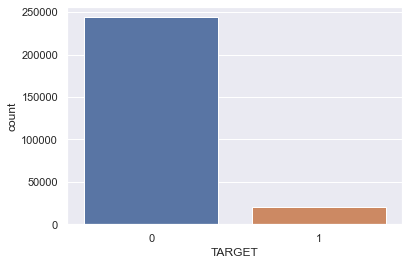

In [104]:
fig, ax = plt.subplots()
ax = sns.countplot(x='TARGET', data=dataset)
plt.show()

In [105]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [106]:
confusion_matrix(y_train, y_pred_train)

array([[195140,      0],
       [ 16359,      0]], dtype=int64)

In [107]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    195140
           1       0.00      0.00      0.00     16359

    accuracy                           0.92    211499
   macro avg       0.46      0.50      0.48    211499
weighted avg       0.85      0.92      0.89    211499



In [108]:
from sklearn.metrics import roc_auc_score

def evaluate_model(x,y):
    lr = LogisticRegression()
    lr.fit(x, y)
    y_pred = lr.predict(x)
    print('--------------------------------------------------------')
    print(' ..:: ROC AUC SCORE ::..')
    print(f'{roc_auc_score(y, lr.predict_proba(x)[:,1])}')
    print('--------------------------------------------------------')
    print(' ..:: CONFUSSION MATRIX ::..')
    print(f'{confusion_matrix(y, y_pred)}')
    print('--------------------------------------------------------')
    print('\t       ..:: CLASSIFICATION REPORT ::..')
    print(classification_report(y, y_pred))

- Seemingly, the Logistic Regression is a very simple model for this case. So, I will balance classes a bit (the next algoritm don't require balanced classes) and try with other algorithm (Light GBM).

## ⚖️ Class Balancing

In [109]:
from imblearn.over_sampling import SMOTE

In [110]:
smote = SMOTE(sampling_strategy = 0.10)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

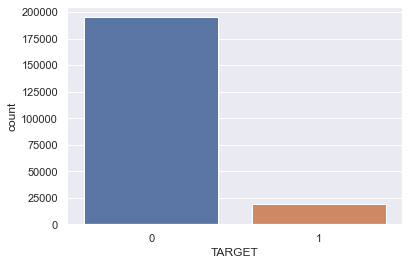

In [111]:
fig, ax = plt.subplots()
data_smote = pd.DataFrame({'TARGET':y_sm})
ax = sns.countplot(x='TARGET', data=data_smote)
plt.show()

## 📈 Light GBM

In [112]:
import lightgbm as lgb

In [113]:
lgb_classifier = lgb.LGBMClassifier(max_depth=3,
                                    num_leaves=6,
                                    objective='binary',
                                    is_unbalance=True).fit(X_train, y_train)

***Train test:***

In [114]:
y_pred_train_lgb = lgb_classifier.predict(X_train)

print('--------------------------------------------------------')
print(' ..:: ROC AUC SCORE ::..')
print(f'{roc_auc_score(y_pred_train_lgb, lgb_classifier.predict_proba(X_train)[:,1])}')
print('--------------------------------------------------------')
print(' ..:: CONFUSSION MATRIX ::..')
print(f'{confusion_matrix(y_train, y_pred_train_lgb)}')
print('\t       ..:: CLASSIFICATION REPORT ::..')
print(classification_report(y_train, y_pred_train_lgb))

--------------------------------------------------------
 ..:: ROC AUC SCORE ::..
1.0
--------------------------------------------------------
 ..:: CONFUSSION MATRIX ::..
[[125628  69512]
 [  6081  10278]]
	       ..:: CLASSIFICATION REPORT ::..
              precision    recall  f1-score   support

           0       0.95      0.64      0.77    195140
           1       0.13      0.63      0.21     16359

    accuracy                           0.64    211499
   macro avg       0.54      0.64      0.49    211499
weighted avg       0.89      0.64      0.73    211499



In [115]:
lgb_sm_classifier = lgb.LGBMClassifier(max_depth=3,
                                    num_leaves=6,
                                    objective='binary',
                                    learning_rate=0.1,
                                    is_unbalance=True).fit(X_sm, y_sm)

y_pred_sm_lgb = lgb_sm_classifier.predict(X_sm)

print('--------------------------------------------------------')
print(' ..:: ROC AUC SCORE ::..')
print(f'{roc_auc_score(y_pred_sm_lgb, lgb_classifier.predict_proba(X_sm)[:,1])}')
print('--------------------------------------------------------')
print(' ..:: CONFUSSION MATRIX ::..')
print(f'{confusion_matrix(y_sm, y_pred_sm_lgb)}')
print('\t       ..:: CLASSIFICATION REPORT ::..')
print(classification_report(y_sm, y_pred_sm_lgb))

--------------------------------------------------------
 ..:: ROC AUC SCORE ::..
0.9890031294517343
--------------------------------------------------------
 ..:: CONFUSSION MATRIX ::..
[[124550  70590]
 [  7065  12449]]
	       ..:: CLASSIFICATION REPORT ::..
              precision    recall  f1-score   support

           0       0.95      0.64      0.76    195140
           1       0.15      0.64      0.24     19514

    accuracy                           0.64    214654
   macro avg       0.55      0.64      0.50    214654
weighted avg       0.87      0.64      0.72    214654



## ⛏️ Tuning parameters

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
cv_params = {'max_depth': [2,3,4],
            'n_estimators':[100, 200, 300, 400],
            'learning_rate':[0.01,0.001],
            'feature_fraction':[0.70,0.75,0.80],
            'bagging_fraction':[0.70,0.75,0.80],
            'learning_rate':[0.1,0.01],
             'num_leaves':[6,7,8,9]}

In [118]:
optimized_model = GridSearchCV(lgb_sm_classifier, cv_params, scoring='recall', cv = 4)

In [119]:
%%time  2:30 hours
optimized_model.fit(X_sm, y_sm)

In [120]:
print(optimized_model.best_params_)

In [121]:
print(optimized_model.best_score_) # 0.668343393566961

## ✅ Optimized model

In [122]:
best_lgb = lgb.LGBMClassifier(n_estimators=400,
                              max_depth=4,
                              num_leaves=9,
                              objective='binary',
                              learning_rate=0.1,
                              feature_fraction=0.75,
                              bagging_fraction=0.7,
                              is_unbalance=True,
                              random_state=12)

In [123]:
best_lgb.fit(X_sm, y_sm)

[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


LGBMClassifier(bagging_fraction=0.7, feature_fraction=0.75, is_unbalance=True,
               max_depth=4, n_estimators=400, num_leaves=9, objective='binary',
               random_state=12)

In [124]:
y_pred_lgb_train_best = best_lgb.predict(X_train)
y_pred_sm_lgb_test_best = best_lgb.predict(X_test)

In [125]:
print('--------------------------------------------------------')
print(' ..:: ROC AUC SCORE ::..')
print(f'{roc_auc_score(y_pred_sm_lgb_test_best, best_lgb.predict_proba(X_test)[:,1])}')
print('--------------------------------------------------------')
print(' ..:: CONFUSSION MATRIX ::..')
print(f'{confusion_matrix(y_test, y_pred_sm_lgb_test_best)}')
print('\t       ..:: CLASSIFICATION REPORT ::..')
print(classification_report(y_test, y_pred_sm_lgb_test_best))

--------------------------------------------------------
 ..:: ROC AUC SCORE ::..
1.0
--------------------------------------------------------
 ..:: CONFUSSION MATRIX ::..
[[32734 16051]
 [ 1555  2535]]
	       ..:: CLASSIFICATION REPORT ::..
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     48785
           1       0.14      0.62      0.22      4090

    accuracy                           0.67     52875
   macro avg       0.55      0.65      0.51     52875
weighted avg       0.89      0.67      0.74     52875



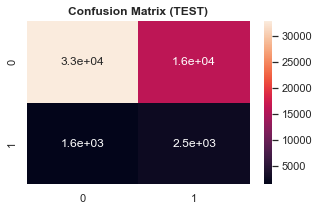

In [126]:
fig, ax = plt.subplots()
fig.set_size_inches(5,3)

ax.set_title('Confusion Matrix (TEST)', weight='bold')
conf_mat = confusion_matrix(y_test, y_pred_sm_lgb_test_best)
sns.heatmap(conf_mat, annot=True)
plt.show()

## 💽 Saving final model

In [127]:
import pickle

with open("output/model.pickle", "wb") as wb:
    pickle.dump(best_lgb, wb)

## 📜 Conclusions

- The logistic regression is a model very simple for real fraud detection cases.
- Although the accuracy score is almost 70%, the model is able to predict correctly more than a half of fraud cases (2/3).
- Throughout this notebook, I was saving cleaned data, transformed data and the final model so that people can use it freely.